<a href="https://colab.research.google.com/github/rakeshvitta/rakeshvitta/blob/main/Assignment2_Group250.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1>
<b>Team:</b> <br>

1.   NAVIN APPUKUTTAN NAIR - 2021fc04720.  <br>
2.   N VISWANATHAN - 2021fc04318. <br>
3.   RAKESH VITTA - 2021fc04673.  <br>

**Dataset:** Wheat Seed Classification <br>

Location of the Dataset: https://github.com/rakeshvitta/rakeshvitta/blob/488395bec588de7215587b4ab5b445386331da56/seeds.csv  <br>
</h1>

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
import itertools
from sklearn.preprocessing import normalize
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier


%matplotlib inline

In [2]:

url = 'https://raw.githubusercontent.com/rakeshvitta/rakeshvitta/main/seeds.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
#Check the data type of the class(Type) and printing the values it takes and counts for each value
df['Type'].dtypes
df['Type'].value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

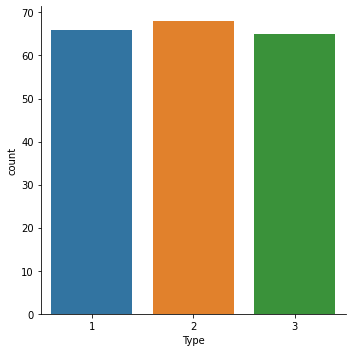

In [5]:
#Looking at the values the dataset is not imbalanced. Visualize the balance:
plot = sns.catplot(x="Type", kind="count",  data=df)

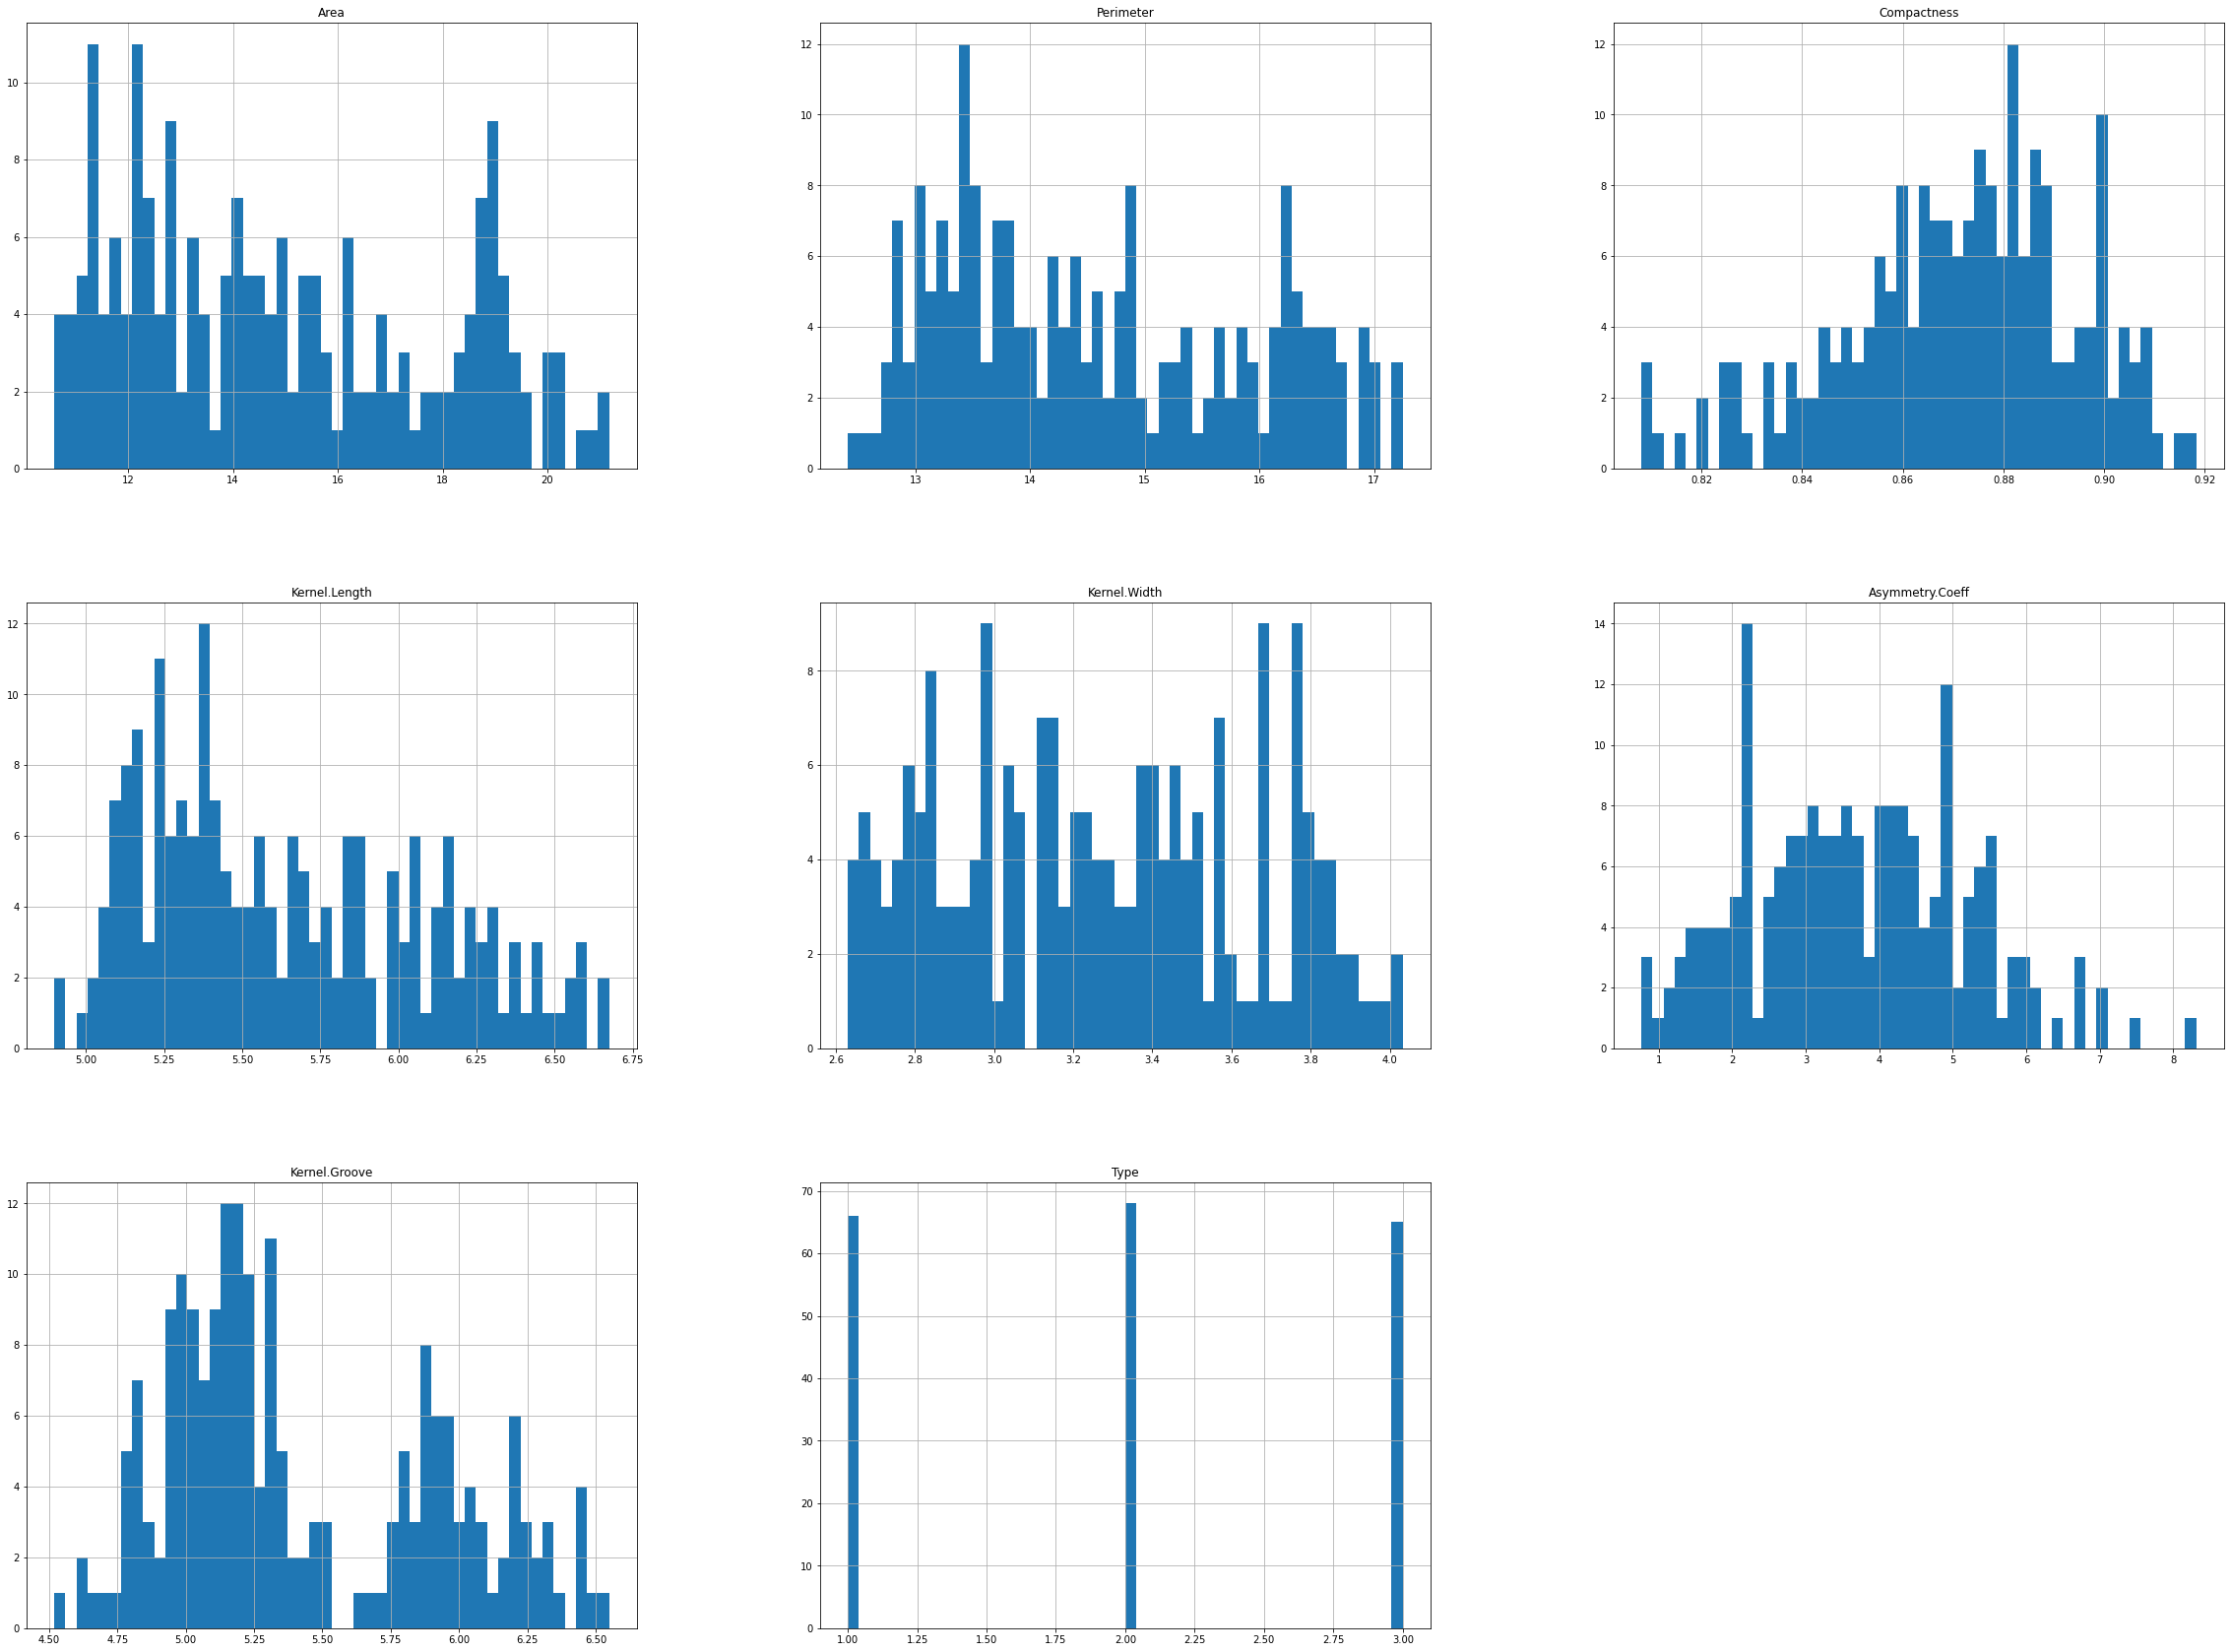

In [6]:
df.hist(bins=50, figsize=(40,30))
plt.show()

In [7]:
df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [8]:
df.isnull().sum() 

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

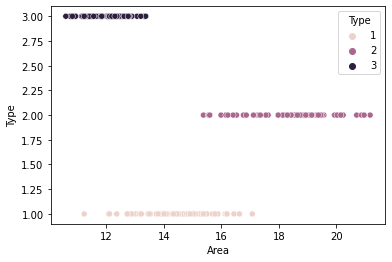

In [9]:
#Checking Area to Type distribution
sns.scatterplot(x=df['Area'],y=df['Type'],hue=df['Type'])

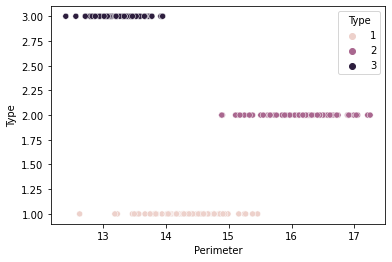

In [10]:
#Checking Perimeter to Type distribution
sns.scatterplot(x=df['Perimeter'],y=df['Type'],hue=df['Type'])

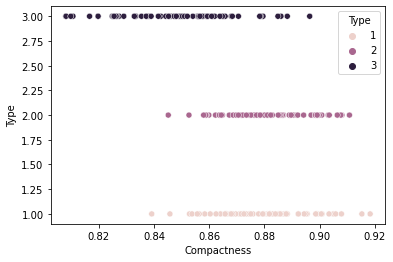

In [11]:
#Checking Compactness to Type distribution
sns.scatterplot(x=df['Compactness'],y=df['Type'],hue=df['Type'])

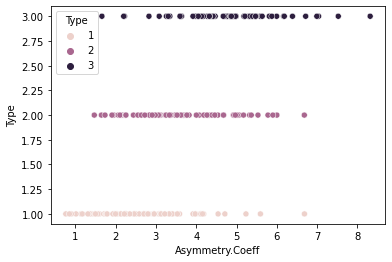

In [12]:
#Checking Asymmetry.Coeff to Type distribution
sns.scatterplot(x=df['Asymmetry.Coeff'],y=df['Type'],hue=df['Type'])

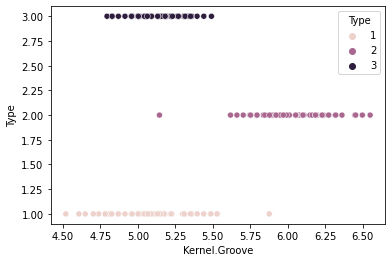

In [13]:

#Checking Kernel.Groove to Type distribution
sns.scatterplot(x=df['Kernel.Groove'],y=df['Type'],hue=df['Type'])

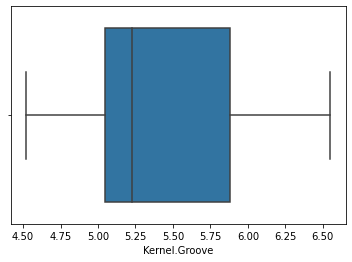

In [14]:
sns.boxplot(x=df['Kernel.Groove'])

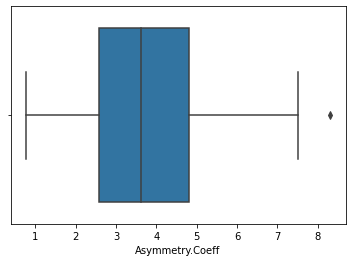

In [15]:
sns.boxplot(x=df['Asymmetry.Coeff'])

We see an outlier in Asymmetry.Coeff feature.

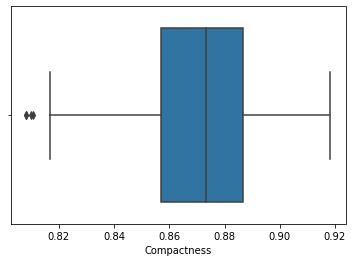

In [16]:
sns.boxplot(x=df['Compactness'])

We see some outliers in Compactness feature

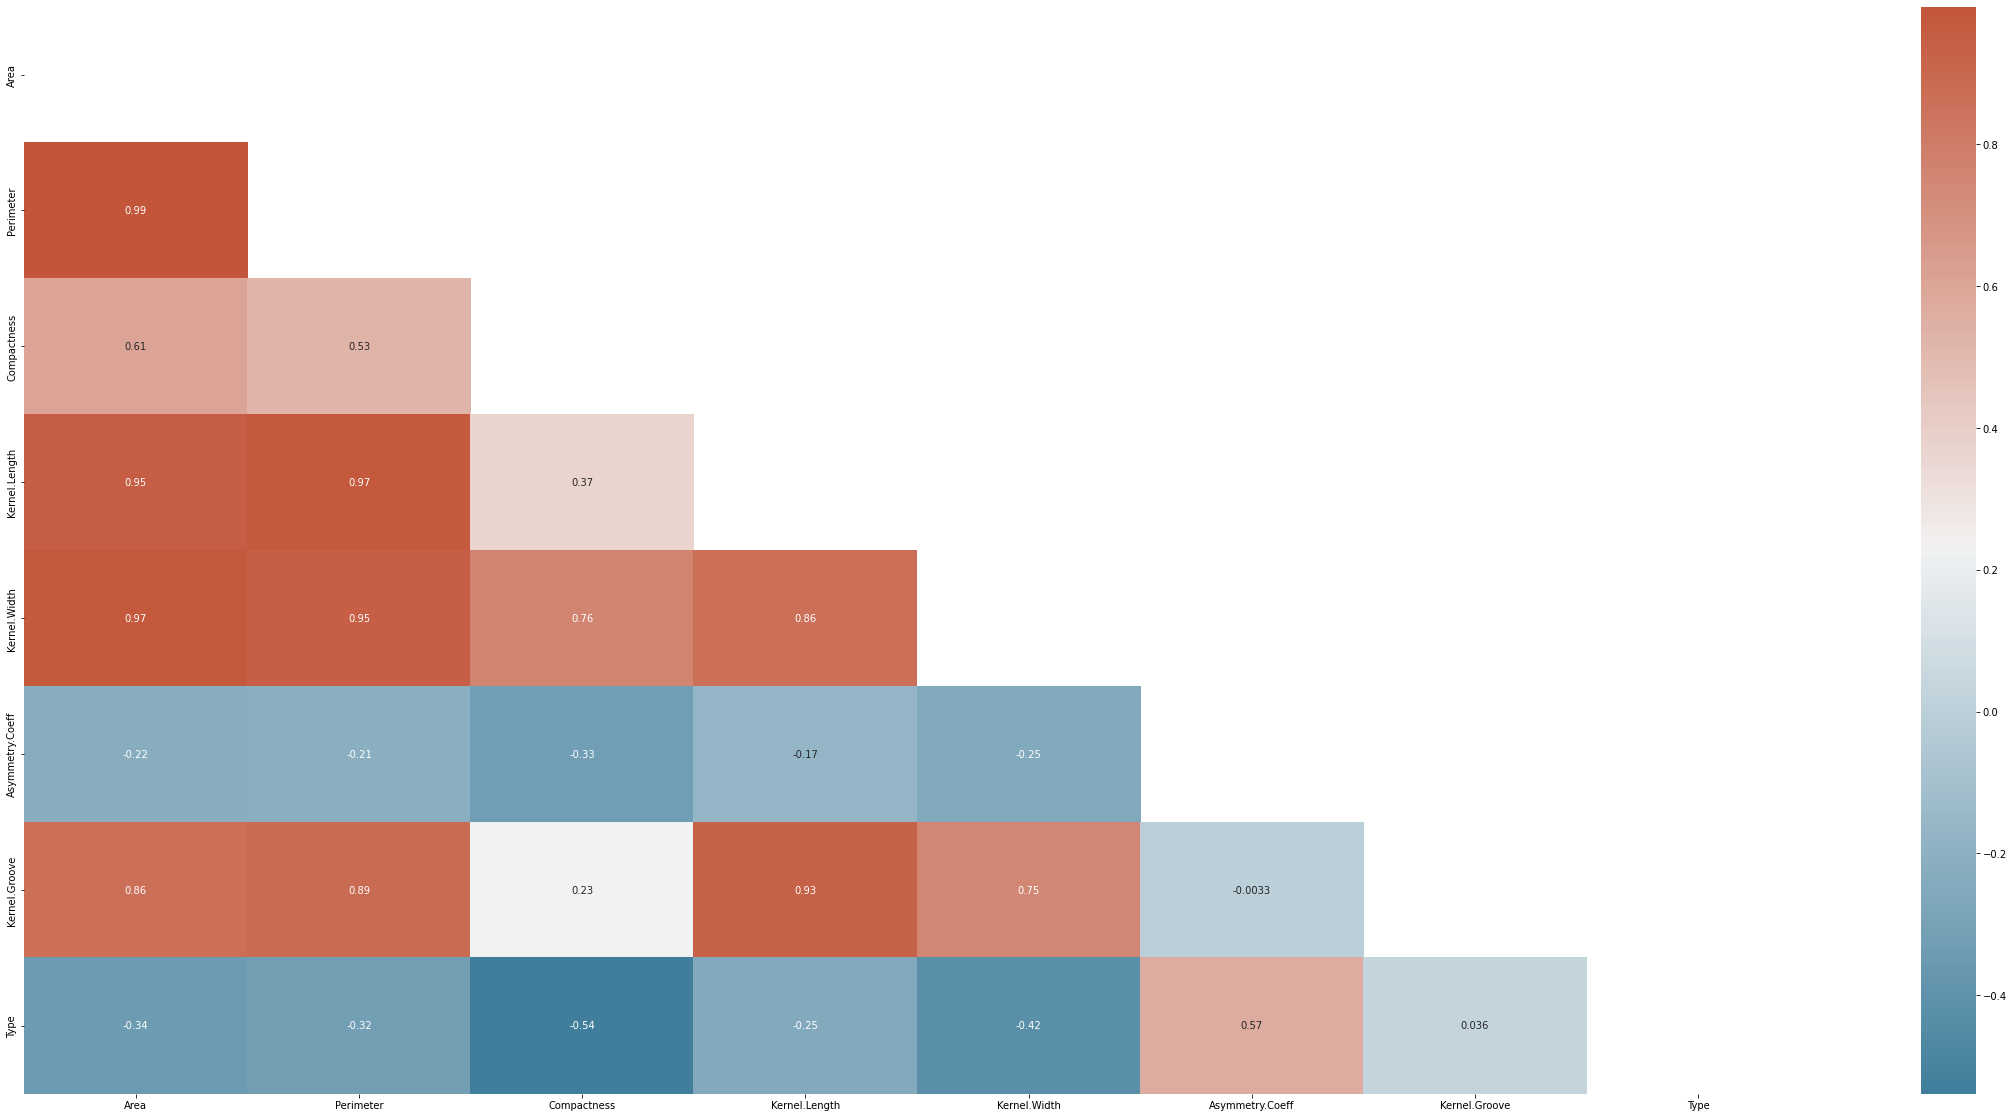

In [17]:
#Correlation Analysis on all the features against each other
cor = df.corr()
f, ax = plt.subplots(figsize=(40, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Generate a mask for upper traingle of the correlation matrix
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, annot=True, mask=mask, cmap=cmap)

We see that Perimeter and Area are highly correlated. Kernel width and Area are also highly correlated. 

In [18]:
print("Type <-> Perimeter", cor['Type'].loc['Perimeter'])
print("Type <-> Area", cor['Type'].loc['Area'])
print("Type <-> Kernel.Width", cor['Type'].loc['Kernel.Width'])

Type <-> Perimeter -0.3222233420464876
Type <-> Area -0.34066440376649393
Type <-> Kernel.Width -0.4219607276403797


In [19]:
#Copying to a new Data Frame for preprocessing and cleaning
df_pre = df.copy(deep=True)


In [20]:
#Dropping Perimeter
df_pre.drop(['Perimeter'], axis = 1, inplace = True)


In [22]:
df_pre.columns

Index(['Area', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove', 'Type'],
      dtype='object')

In [24]:
#Outlier removal in columns Asymmetry.Coeff and Compactness
q1 = df_pre['Asymmetry.Coeff'].quantile(0.25)
q3 = df_pre['Asymmetry.Coeff'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr
high = q3+1.5*iqr
df_out = df_pre.loc[(df_pre['Asymmetry.Coeff'] > low) & (df_pre['Asymmetry.Coeff'] < high)]

In [32]:
q1 = df_out['Compactness'].quantile(0.25)
q3 = df_out['Compactness'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr
high = q3+1.5*iqr
df_out2 = df_out.loc[(df_out['Compactness'] > low) & (df_out['Compactness'] < high)]

In [33]:
df_out2.describe()

,Area,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,15.000670,0.871990,5.651124,3.277820,3.649393,5.426521,1.969072
std,2.908234,0.021824,0.446297,0.373481,1.439054,0.497505,0.807396
min,10.590000,0.816700,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.395000,0.858100,5.267000,2.967000,2.516250,5.045250,1.000000
50%,14.505000,0.873950,5.558500,3.263500,3.597500,5.247000,2.000000
75%,17.610000,0.886900,6.014250,3.571250,4.708750,5.879000,3.000000
max,21.180000,0.918300,6.675000,4.033000,7.524000,6.550000,3.000000


In [36]:
df_out2.shape

(194, 7)

In [37]:
df_pre.shape

(199, 7)

Feature Engineering

In [39]:
#Splitting the dataset into X and y. X->Features and y->Type
X = df_out2.iloc[:, 0:6]
X.head()

,Area,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,0.8710,5.763,3.312,2.221,5.220
1,14.88,0.8811,5.554,3.333,1.018,4.956
2,14.29,0.9050,5.291,3.337,2.699,4.825
3,13.84,0.8955,5.324,3.379,2.259,4.805
4,16.14,0.9034,5.658,3.562,1.355,5.175


In [47]:
y = df_out2.iloc[:, 6:7]
y.dtypes

Type    int64
dtype: object

In [48]:
y.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [43]:
df['Type'].value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

In [44]:
df_pre['Type'].value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

In [42]:
df_out2['Type'].value_counts()

2    68
1    66
3    60
Name: Type, dtype: int64

Seems like the outliers were only from the Type=3. 
We should check the model performance when trained on df_pre and also on df_out2.

*   df_pre - Preprocessed data set
*   df_out2 - Preprocessed and outliers removed in two columns




In [ ]:
#Normalization
#Since we are using a decision tree classifier here we might not need the normalization 

Model Building

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2)

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X_train, y_train, cv=10)


array([0.8125    , 0.9375    , 0.9375    , 0.875     , 1.        ,
       1.        , 0.93333333, 0.93333333, 0.86666667, 1.        ])

In [61]:
def plot_confusion_matrix(conf_mat):
  with plt.style.context(('ggplot', 'seaborn')):
      fig = plt.figure(figsize=(6,6), num=1)
      plt.imshow(conf_mat, interpolation='nearest',cmap= plt.cm.Blues )
      plt.xticks([0,1,2],[0,1,2])
      plt.yticks([0,1,2],[0,1,2])
      plt.xlabel('Predicted Label')
      plt.ylabel('Actual Label')
      for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
                  plt.text(j, i,conf_mat[i, j], horizontalalignment="center",color="red")
      plt.grid(None)
      plt.title('Confusion Matrix')
      plt.colorbar();

In [62]:
clf.fit(X_train,y_train)
y_pred_test = clf.predict(X_test)

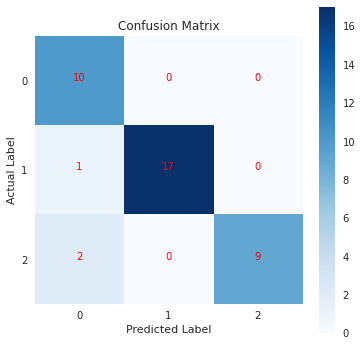

In [63]:
conf_mat = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(conf_mat)

In [64]:
accuracy_score(y_test,y_pred_test)

0.9230769230769231

In [69]:
f1_score(y_test,y_pred_test,average='macro')

0.9136645962732919